# Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
###### xArray ######

# DataArray: data structure with Single multi-dimensional variable and coordinates
    # 4 Attributes:
        # Values: numpy.ndarray holds array values
        # dims: dimension names for each axis ~"(x, y, z)"
        # coords:  a dict-like container of arrays (coordinates) that label each point 
        # attrs: an OrderedDict to hold arbitrary metadata (attributes)

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from statistics import mean
from numpy import mean

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)


Next, download the NetCDF file using wget.

In [2]:

! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

tc = ! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

#tc


--2021-11-11 01:41:17--  http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.19.40
Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.19.40|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc [following]
--2021-11-11 01:41:18--  https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736656452 (703M) [application/x-netcdf]
Saving to: ‘CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc.30’

CERES_EBAF-TOA_Edit 100%[===================>] 702.53M  84.6MB/s    in 8.1s    

2021-11-11 01:41:30 (87.0 MB/s) - ‘CERES_EBAF-TOA_Edition4

In [3]:

import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)


/home/jovyan/.cache/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1.1) Open the dataset and display its contents 


In [4]:

ds = xr.open_dataset(fname)
ds


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [5]:

# import netCDF4
# from netCDF4 import Dataset  

# #xarray.open_dataset(tc)

# #ds = xr.Dataset()

# #ds.to_netcdf("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc")

# ds_disk = xr.open_dataset("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc", decode_times = False,)

# ds_disk

# # # npLDEO = np.loadtxt("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc")

# # #files = "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"

# # ld = "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"
# # ncds = netCDF4.Dataset(ld)
# # ds = xr.open_dataset(ld)

# # display(ds)


## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [6]:

#ds.variables
#ds.info()
#ds.head()

print("Variable Long Names: \n\n",
      
"1: ",ds.toa_sw_all_mon.long_name, "\n",
"2: ",ds.toa_lw_all_mon.long_name,"\n",
"3: ",ds.toa_net_all_mon.long_name,"\n",

"4: ",ds.toa_sw_clr_mon.long_name,"\n",
"5: ",ds.toa_lw_clr_mon.long_name,"\n",
"6: ",ds.toa_net_clr_mon.long_name,"\n",

"7: ",ds.toa_cre_sw_mon.long_name,"\n",
"8: ",ds.toa_cre_lw_mon.long_name,"\n",
"9: ",ds.toa_cre_net_mon.long_name,"\n",
      
"10: ",ds.solar_mon.long_name,"\n",
      
"11: ",ds.cldarea_total_daynight_mon.long_name,"\n",
"12: ",ds.cldpress_total_daynight_mon.long_name,"\n",
"13: ",ds.cldtemp_total_daynight_mon.long_name,"\n",
"14: ",ds.cldtau_total_day_mon.long_name)


Variable Long Names: 

 1:  Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions 
 2:  Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions 
 3:  Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions 
 4:  Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions 
 5:  Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions 
 6:  Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions 
 7:  Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means 
 8:  Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means 
 9:  Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means 
 10:  Incoming Solar Flux, Monthly Means 
 11:  Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions 
 12:  Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions 
 13:  Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditi

## 2.1) Calculate the time-mean of the entire dataset

In [7]:

ds.time.mean()


<xarray.DataArray 'time' ()>
array('2008-08-14T18:05:19.211822656', dtype='datetime64[ns]')

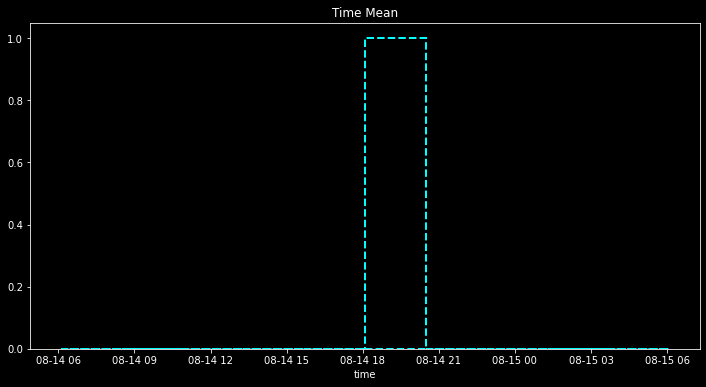

In [8]:

plt.style.use('dark_background')

ds.time.mean().plot( lw = 2, 
                    #figsize = (15, 7), 
                    linestyle = "--", 
                    edgecolor = "cyan",
                    color = "k"
                   )
plt.title(label = "Time Mean");

##ds.solar_mon.mean(dim=(ds["lon"], ds["lat"])).plot()


## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

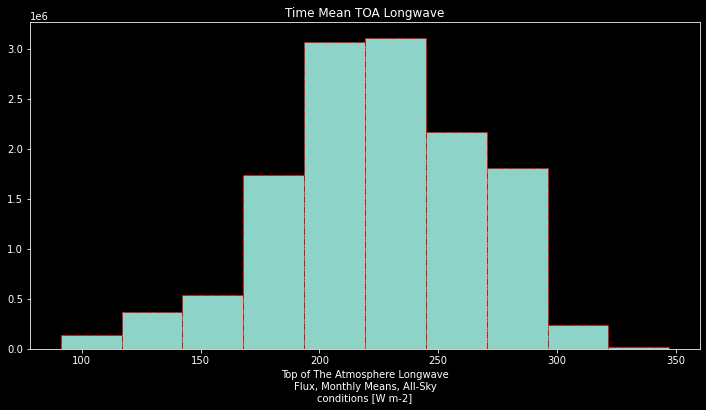

In [9]:

toaLW = ds.toa_lw_all_mon.plot(lw = 1, linestyle = "-.", edgecolor = "red");
plt.title(label = "Time Mean TOA Longwave");

#fig, ax = plt.subplots(tight_layout=True)
#hist = ax.plot(ds.time,ds.toa_lw_all_mon)

#ds.toa_lw_all_mon[1:203].mean().plot()

#ds.solar_mon.mean("time").isel().plot()

#ds.solar_mon.mean(dim=('lon', 'lat')).plot()

#ds.toa_net_all_mon[0].plot(vmin = -100, vmax = 100)


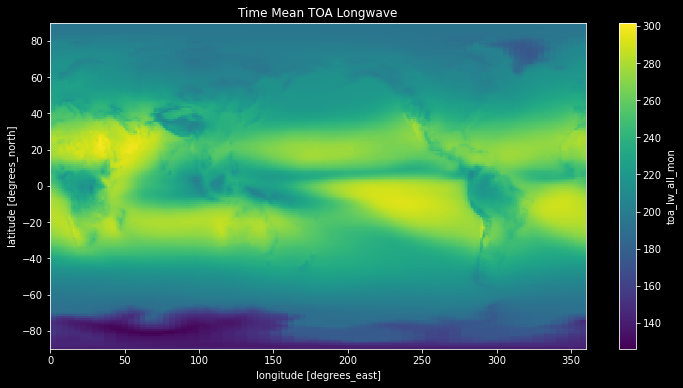

In [10]:

toaLWi = ds.toa_lw_all_mon.mean("time").plot();
plt.title(label = "Time Mean TOA Longwave");


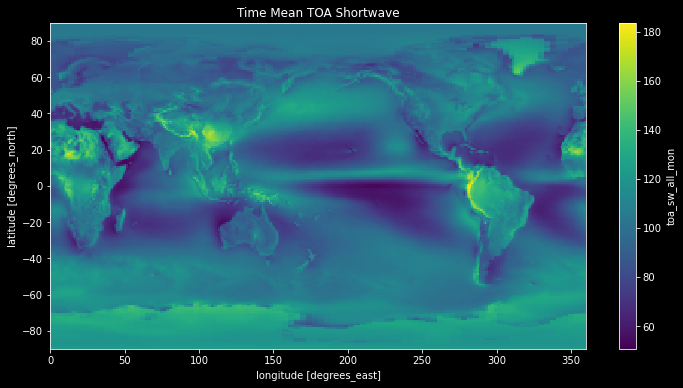

In [11]:

toaSWi = ds.toa_sw_all_mon.mean("time").plot();
plt.title(label = "Time Mean TOA Shortwave");


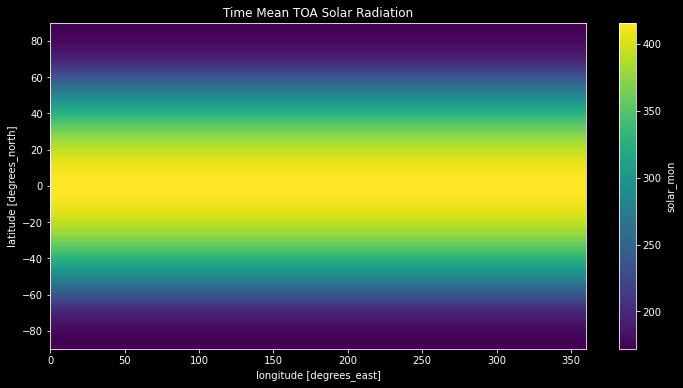

In [12]:

toaSol = ds.solar_mon.mean("time").plot();
plt.title(label = "Time Mean TOA Solar Radiation");


## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

In [13]:

ds.toa_net_all_mon


<xarray.DataArray 'toa_net_all_mon' (time: 203, lat: 180, lon: 360)>
[13154400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Top of The Atmosphere Net Flux, Monthly Means, All-Sky co...
    standard_name:  TOA Net Flux - All-Sky
    CF_name:        toa_net_downward_flux
    units:          W m-2
    valid_min:           -400.000
    valid_max:            400.000

In [14]:

flux = ds["toa_sw_all_mon"] + ds["toa_lw_all_mon"] + ds["solar_mon"] 

flux

#fluxI = sum(ds["toa_sw_all_mon"] + ds["toa_lw_all_mon"] + ds["solar_mon"])

#fluxI


<xarray.DataArray (time: 203, lat: 180, lon: 360)>
array([[[ 240.58002 ,  240.58002 ,  240.58002 , ...,  240.58002 ,
          240.58002 ,  240.58002 ],
        [ 240.43    ,  240.43    ,  240.43    , ...,  240.43    ,
          240.43    ,  240.43    ],
        [ 243.43    ,  243.43    ,  243.43    , ...,  243.43    ,
          243.43    ,  243.43    ],
        ...,
        [ 216.65    ,  216.65    ,  216.65    , ...,  216.65    ,
          216.65    ,  216.65    ],
        [ 213.      ,  213.      ,  213.      , ...,  213.      ,
          213.      ,  213.      ],
        [ 214.16    ,  214.16    ,  214.16    , ...,  214.16    ,
          214.16    ,  214.16    ]],

       [[ 124.062004,  124.062004,  124.062004, ...,  124.062004,
          124.062004,  124.062004],
        [ 124.18    ,  124.18    ,  124.18    , ...,  124.18    ,
          124.18    ,  124.18    ],
        [ 125.229   ,  125.229   ,  125.229   , ...,  125.229   ,
          125.229   ,  125.229   ],
...
        [ 176.5     ,  176.5     ,  176.5     , ...,  176.5     ,
          176.5     ,  176.5     ],
        [ 176.2     ,  176.2     ,  176.2     , ...,  176.2     ,
          176.2     ,  176.2     ],
        [ 175.2     ,  175.2     ,  175.2     , ...,  175.2     ,
          175.2     ,  175.2     ]],

       [[1022.1     , 1022.1     , 1022.1     , ..., 1022.1     ,
         1022.1     , 1022.1     ],
        [1023.4     , 1023.4     , 1023.4     , ..., 1023.4     ,
         1023.4     , 1023.4     ],
        [1021.5     , 1021.5     , 1021.5     , ..., 1021.5     ,
         1021.5     , 1021.5     ],
        ...,
        [ 169.14801 ,  169.14801 ,  169.14801 , ...,  169.14801 ,
          169.14801 ,  169.14801 ],
        [ 168.44899 ,  168.44899 ,  168.44899 , ...,  168.44899 ,
          168.44899 ,  168.44899 ],
        [ 168.549   ,  168.549   ,  168.549   , ...,  168.549   ,
          168.549   ,  168.549   ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

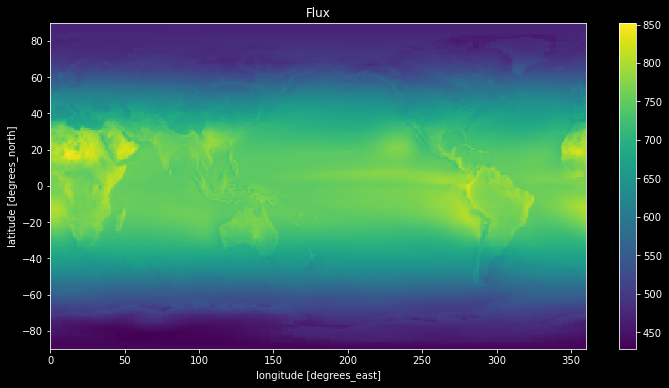

In [15]:

flux.mean("time").plot()
plt.title(label = "Flux");


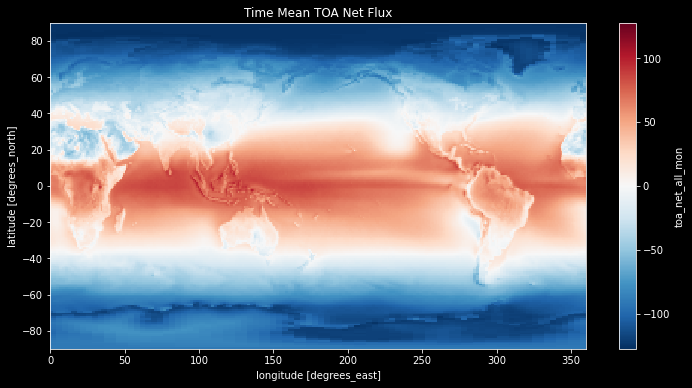

In [16]:

toaNet = ds.toa_net_all_mon.mean("time").plot();
plt.title(label = "Time Mean TOA Net Flux");


## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [34]:

ds.lon.interp().values
ds.lat.interp().values
ds.toa_net_all_mon.interp().values

#####################################################

# len(ds.toa_net_all_mon) #= 203

lenNet = len(ds.toa_net_all_mon)  
meanR = sum(ds.toa_net_all_mon) / lenNet
print("\n",meanR);

#netRad = 

#ds.toa_net_all_mon.mean("time").plot();
#plt.title(label = "Time Mean TOA Net Flux");

########################################################

lenNe = mean(ds.toa_net_all_mon)  
print("\n",lenNe);




 <xarray.DataArray 'toa_net_all_mon' (lat: 180, lon: 360)>
array([[ -91.287636,  -91.287636,  -91.287636, ...,  -91.287636,
         -91.287636,  -91.287636],
       [ -91.45633 ,  -91.45633 ,  -91.45633 , ...,  -91.45633 ,
         -91.45633 ,  -91.45633 ],
       [ -91.82986 ,  -91.82986 ,  -91.82986 , ...,  -91.82986 ,
         -91.82986 ,  -91.82986 ],
       ...,
       [-125.825096, -125.825096, -125.825096, ..., -125.825096,
        -125.825096, -125.825096],
       [-125.93955 , -125.93955 , -125.93955 , ..., -125.93955 ,
        -125.93955 , -125.93955 ],
       [-126.26464 , -126.26464 , -126.26464 , ..., -126.26464 ,
        -126.26464 , -126.26464 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     datetime64[ns] 2017-01-15

 <xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)


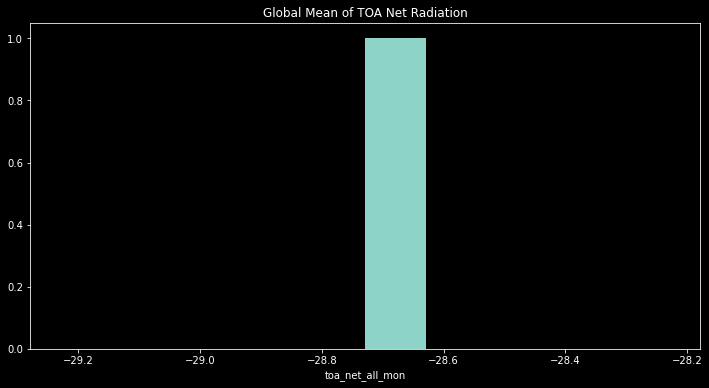

In [45]:

lenNe.plot();
plt.title(label = "Global Mean of TOA Net Radiation");


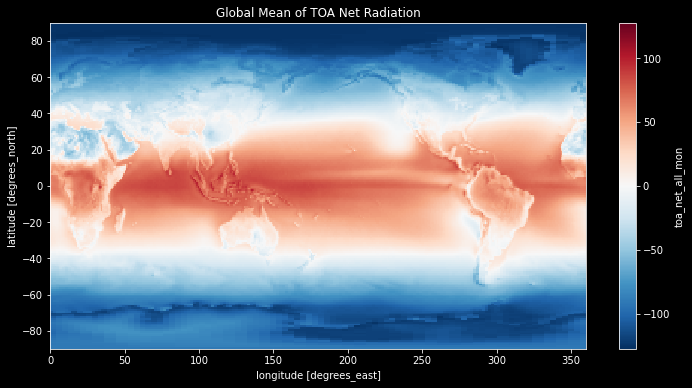

In [46]:

meanR.plot()
plt.title(label = "Global Mean of TOA Net Radiation");


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
Data variables: (12/14)
    toa_sw_all_mon               (time, lon) float32 11.46 2.452 ... 151.0 152.4
    toa_lw_all_mon               (time, lon) float32 151.5 155.3 ... 177.9 173.1
    toa_net_all_mon              (time, lon) float32 -124.8 -119.8 ... -78.45
    toa_sw_clr_mon               (time, lon) float32 22.87 27.39 ... 150.3 133.3
    toa_lw_clr_mon               (time, lon) float32 137.8 140.4 ... 210.6 205.3
    toa_net_clr_mon              (time, lon) float32 -122.6 -129.9 ... -92.13
    ...                           ...
    toa_cre_net_mon              (time, lon) float32 -2.182 10.13 ... 13.42
    solar_mon                    (time, lon) float32 38.05 38.07 ... 247.0 247.0
    cldarea_total_daynight_mon   (time, lon) float32 4

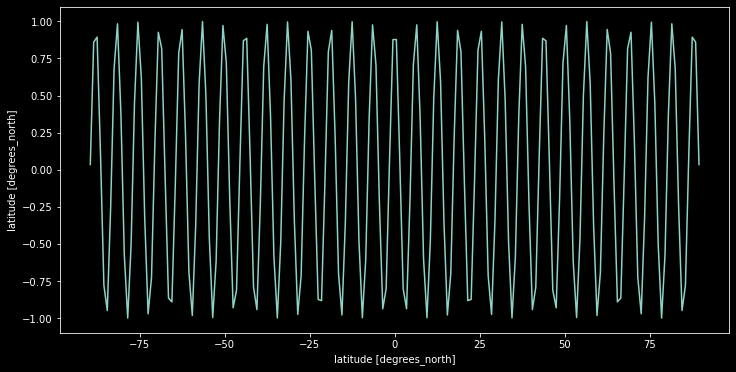

In [106]:
# \lamda = lat

weights = np.cos(ds.lat)

weightCheack = ds.weighted(weights).mean("lat")

#mean(cosL)

print(weightCheck)

weights.plot()


## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

[ 0.03538324  0.8600617   0.8940034   0.1060025  -0.7794566  -0.94828695
 -0.24526659  0.6832507   0.9835905   0.37962168 -0.57336956 -0.99920744
 -0.50637865  0.45201233  0.99482524  0.6230004  -0.32160813 -0.97053164
 -0.7271528   0.18476693  0.9268128   0.8167513  -0.04422762 -0.86454386
 -0.8900025  -0.09719691  0.78497106  0.94544023  0.23667604 -0.689687
 -0.981955   -0.3714181   0.5805989   0.99881595  0.49872625 -0.45989013
 -0.9956856  -0.6160523   0.32997662  0.97262657  0.7210481  -0.1934586
 -0.93010044 -0.8116122   0.05306854  0.8689583   0.8859318   0.0883837
 -0.790424   -0.9425195  -0.22806694  0.6960693   0.9802426   0.3631854
 -0.5877828  -0.9983462  -0.49103472  0.46773183  0.9964679   0.609056
 -0.3383192  -0.97464526 -0.71488696  0.20213512  0.9333151   0.8064095
 -0.06190529 -0.87330467 -0.8817917  -0.07956357  0.79581493  0.9395249
  0.21943995 -0.70239705 -0.97845346 -0.35492426  0.59492064  0.99779826
  0.48330474 -0.47553694 -0.9971722  -0.6020119   0.34663534

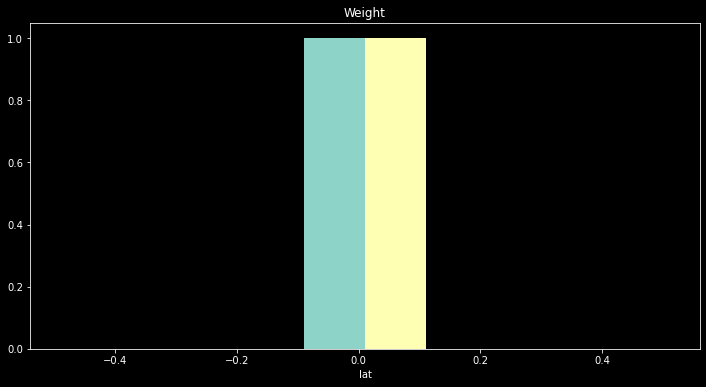

In [123]:

print(weights.interp().values)
print(weightCheck.interp().values)

#####################################################

lenNet1 = len(weights)  
meanR1 = sum(weights) / lenNet1
print("\n",meanR1);

########################################################

lenNe1 = mean(weights)  
print("\n",lenNe1);


meanR1.plot()
lenNe1.plot()
plt.title(label = "Weight");


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?